In [3]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import time
import warnings
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

        

/kaggle/input/mobile-classification/train.csv
/kaggle/input/mobile-classification/test.csv


In [4]:
df1=pd.read_csv('/kaggle/input/mobile-classification/train.csv')
df2=pd.read_csv('/kaggle/input/mobile-classification/test.csv')

In [5]:
df1.head(10)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


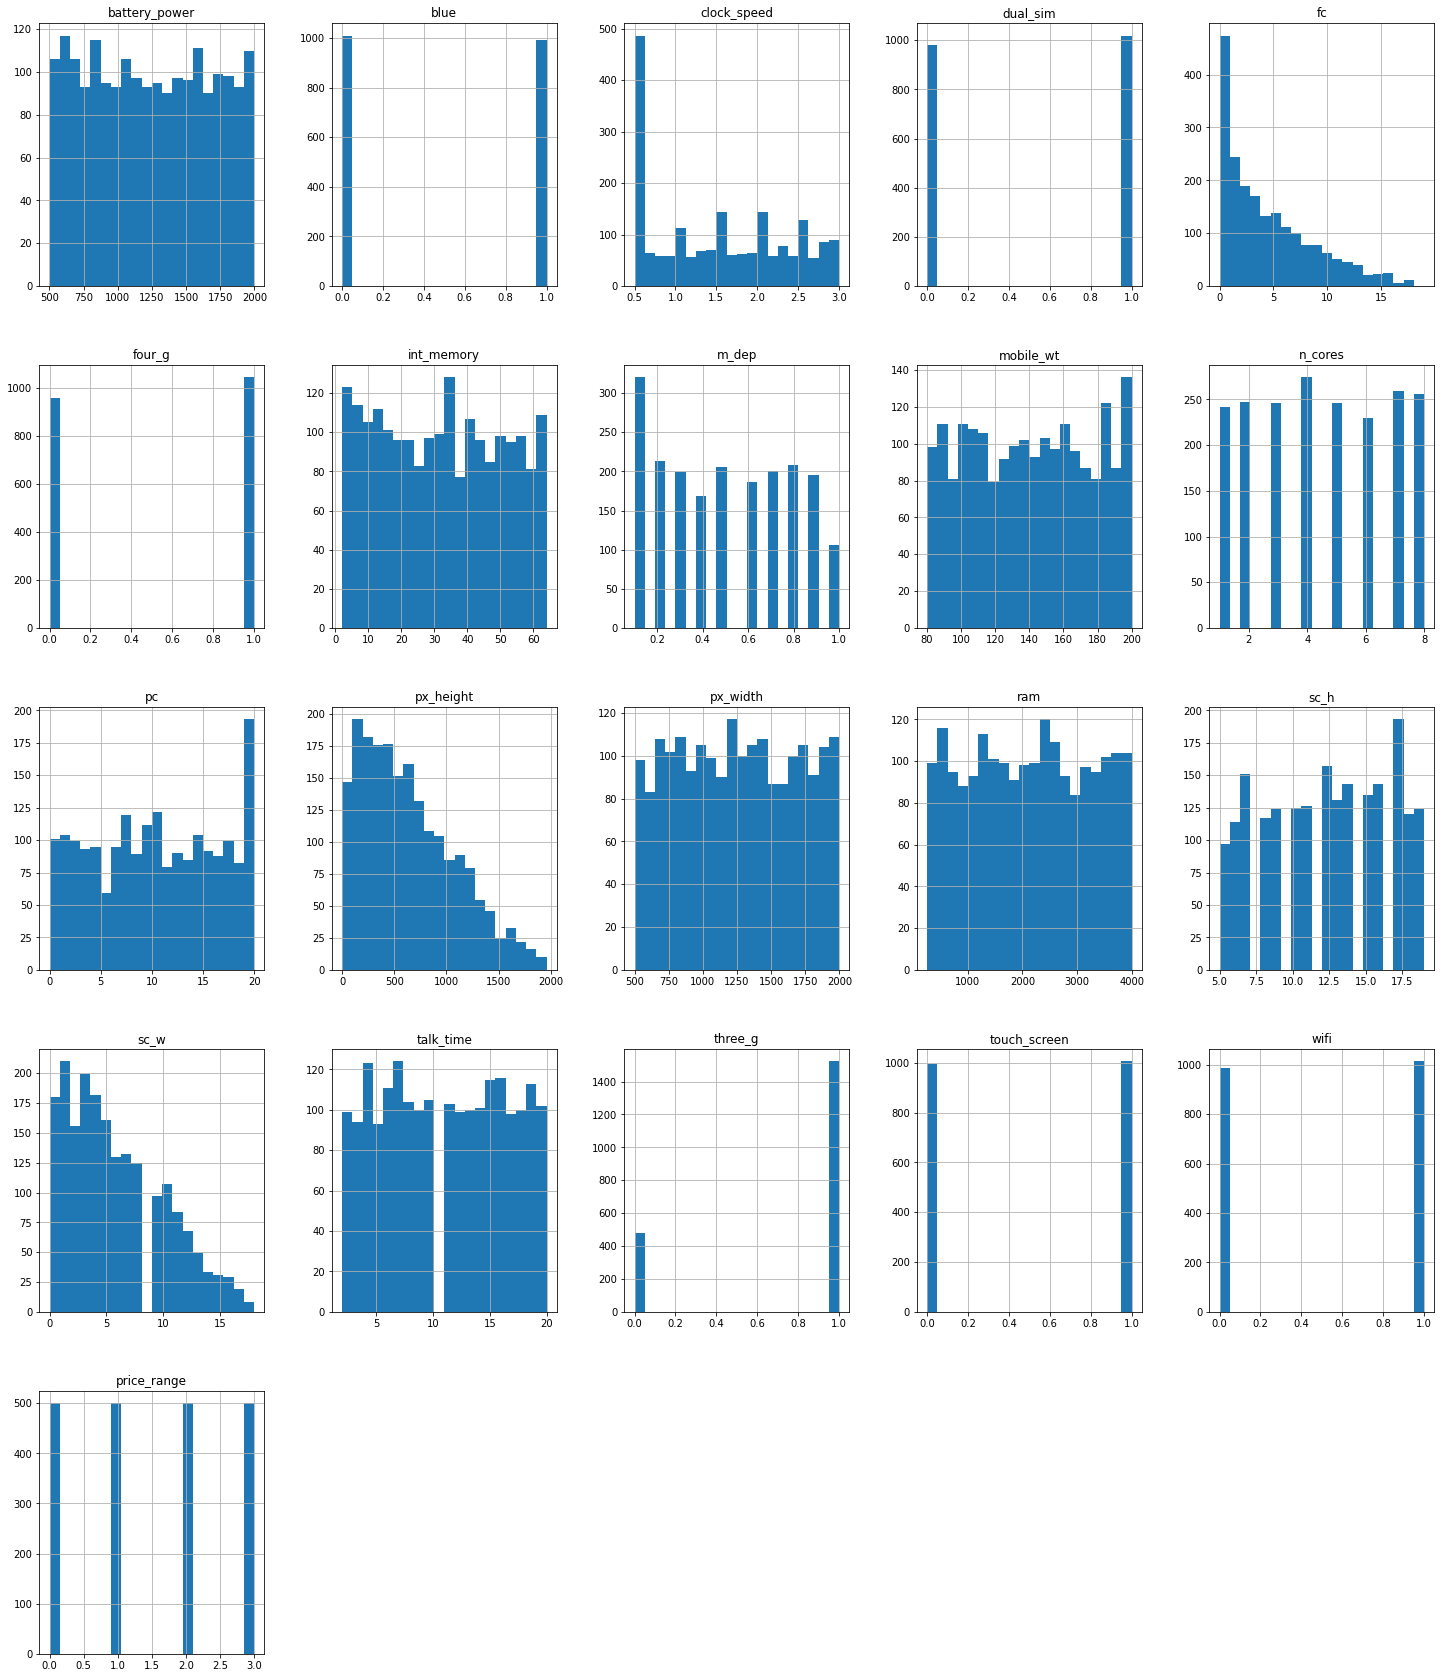

In [6]:
df1.hist(bins=20, figsize=(25,30))
plt.show()

In [7]:
df1.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [9]:
df1.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [10]:
df1['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

df1['price_range']=df1['price_range'].replace({0 : 'so low', 1:'low' , 2 : 'medium' , 3 :'high'})
df1['price_range'].value_counts()

In [11]:
data_copy=df1.copy()
#splitting data to input and output
X=data_copy.drop('price_range',axis=1) #input
y=data_copy['price_range']  #output(label)

In [12]:
print(X.shape)
print(y.shape)

(2000, 20)
(2000,)


In [13]:
#using standerscaler technique to scale all input data to be with the same scale
from sklearn.preprocessing import StandardScaler # importing module 
scaler = StandardScaler()   #making function
for column in ['battery_power','int_memory','mobile_wt','px_height','px_width','ram']:
    df1[column] = scaler.fit_transform(df1[column].values.reshape(-1,1))    #scalling input data

<AxesSubplot:xlabel='battery_power', ylabel='Density'>

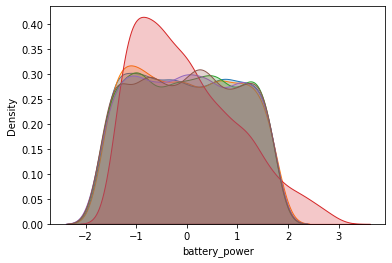

In [14]:
sns.kdeplot(df1['battery_power'], shade=True)
sns.kdeplot(df1['int_memory'], shade=True)
sns.kdeplot(df1['mobile_wt'], shade=True)
sns.kdeplot(df1['px_height'], shade=True)
sns.kdeplot(df1['px_width'], shade=True)
sns.kdeplot(df1['ram'], shade=True)

In [15]:
#splitting all data to train data and test data 
from sklearn.model_selection import train_test_split   # importing module 
#data splitting with 80% train and 20% test and shuffle it
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25,shuffle=True)  

In [16]:
print(' X_train.shape : ',X_train.shape)
print(' y_train.shape : ',y_train.shape)
print(' X_test.shape : ',X_test.shape)
print(' y_test.shape : ',y_test.shape)

 X_train.shape :  (1500, 20)
 y_train.shape :  (1500,)
 X_test.shape :  (500, 20)
 y_test.shape :  (500,)


* model1

In [17]:
model = Sequential()
model.add(Dense(15, input_dim=20, activation='relu'))

model.add(Dense(10, activation='relu'))

model.add(Dense(4, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                315       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 44        
Total params: 519
Trainable params: 519
Non-trainable params: 0
_________________________________________________________________


2022-10-15 16:05:05.234944: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
activation_funcs = ['sigmoid', 'relu', 'tanh'] 
loss_funcs = ['binary_crossentropy','hinge']
param_grid = dict(n_layers=[2,3], first_layer_nodes = [64,32,16], last_layer_nodes = [4],  activation_func = activation_funcs, loss_func = loss_funcs, batch_size = [100], epochs = [20,60])
grid = GridSearchCV(estimator = model, param_grid = param_grid)

In [18]:
history=model.fit(X_train, y_train, batch_size = 10, epochs = 300,validation_split=0.15,validation_data=(X_train,y_train))

Epoch 1/300


2022-10-15 16:05:05.451264: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


128/128 [==============================] - 1s 5ms/step - loss: 62.9563 - accuracy: 0.4243 - val_loss: 18.9844 - val_accuracy: 0.5289
Epoch 2/300
128/128 [==============================] - 0s 2ms/step - loss: 13.4481 - accuracy: 0.5294 - val_loss: 14.3759 - val_accuracy: 0.4667
Epoch 3/300
128/128 [==============================] - 0s 2ms/step - loss: 10.1608 - accuracy: 0.5569 - val_loss: 9.2023 - val_accuracy: 0.5689
Epoch 4/300
128/128 [==============================] - 0s 2ms/step - loss: 7.7941 - accuracy: 0.5710 - val_loss: 7.2691 - val_accuracy: 0.5511
Epoch 5/300
128/128 [==============================] - 0s 2ms/step - loss: 6.6702 - accuracy: 0.5545 - val_loss: 5.1266 - val_accuracy: 0.5600
Epoch 6/300
128/128 [==============================] - 0s 3ms/step - loss: 5.6663 - accuracy: 0.5851 - val_loss: 5.2015 - val_accuracy: 0.5333
Epoch 7/300
128/128 [==============================] - 0s 2ms/step - loss: 5.1829 - accuracy: 0.5812 - val_loss: 3.7581 - val_accuracy: 0.5822
Epoch 

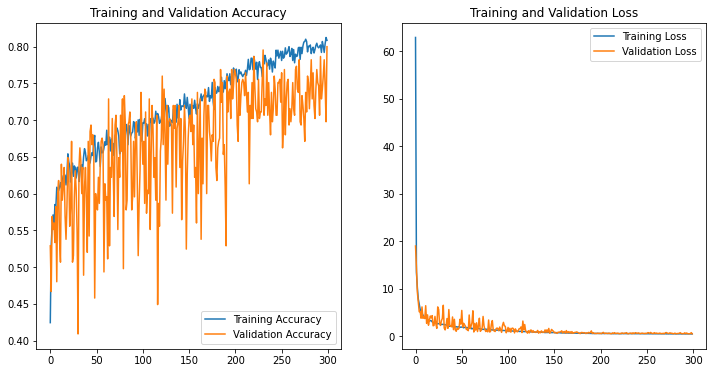

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(300)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [21]:
score = model.evaluate(X_test, 
 y_test,
 batch_size=32)

16/16 [==============================] - 0s 2ms/step - loss: 0.4840 - accuracy: 0.7860
